# Predicting Hospital Readmissions: EDA

## Introduction

Predictive modeling plays a crucial role in healthcare analytics, providing insights into patient outcomes and allowing for proactive interventions. In this Jupyter Notebook, we delve into the Exploratory Data Analysis (EDA) phase of a predictive modeling project, focusing on patient readmission rates.


## Background


Hospital readmissions pose significant challenges for healthcare providers and contribute to increased healthcare costs. Understanding the factors influencing readmission rates can lead to the development of predictive models that aid in identifying high-risk patients and implementing targeted interventions.



## Objective


The primary objective of this analysis is to perform a comprehensive EDA on the dataset related to patient admissions and readmissions. Through visualizations, statistical summaries, and data exploration techniques, we aim to:

- Identify Patterns: Explore patterns and trends in patient data, considering variables such as age, medical history, and initial admission details.

- Feature Importance: Assess the importance of various features in predicting readmission rates. This step is crucial for feature selection in the modeling phase.

- Correlation Analysis: Examine the correlations between different variables to uncover potential relationships that may influence readmission outcomes.



## Dataset


The dataset used for this analysis contains anonymized patient records, including demographic information, medical history, admission details, and readmission status. It is essential to preprocess and clean the data before conducting the EDA to ensure the accuracy and reliability of the insights gained.

## Tools and Libraries
We will leverage popular Python libraries, including NumPy, Pandas, Matplotlib, and Seaborn, to conduct our EDA. These tools provide a robust environment for data manipulation, visualization, and statistical analysis.

Now, let's dive into the data and begin our exploration!

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import CSV file

In [3]:
df = pd.read_csv('hospital_readmissions.csv')

### Initial Data Exploration

In [9]:
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


In [5]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [6]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [10]:
df.set_index('age', inplace=True)

In [21]:
df.head(10)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
age,,,,,,,,,,,,,,,,
[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes


In [25]:
df.describe

<bound method NDFrame.describe of          time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
age                                                                        
[70-80)                 8                72             1             18   
[70-80)                 3                34             2             13   
[50-60)                 5                45             0             18   
[70-80)                 2                36             0             12   
[60-70)                 1                42             0              7   
...                   ...               ...           ...            ...   
[80-90)                14                77             1             30   
[80-90)                 2                66             0             24   
[70-80)                 5                12             0              6   
[70-80)                 2                61             3             15   
[50-60)                10                37           

In [26]:
df.size

400000

### Univariate Analysis

array([[<Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'n_lab_procedures'}>,
        <Axes: title={'center': 'n_procedures'}>],
       [<Axes: title={'center': 'n_medications'}>,
        <Axes: title={'center': 'n_outpatient'}>,
        <Axes: title={'center': 'n_inpatient'}>],
       [<Axes: title={'center': 'n_emergency'}>, <Axes: >, <Axes: >]],
      dtype=object)

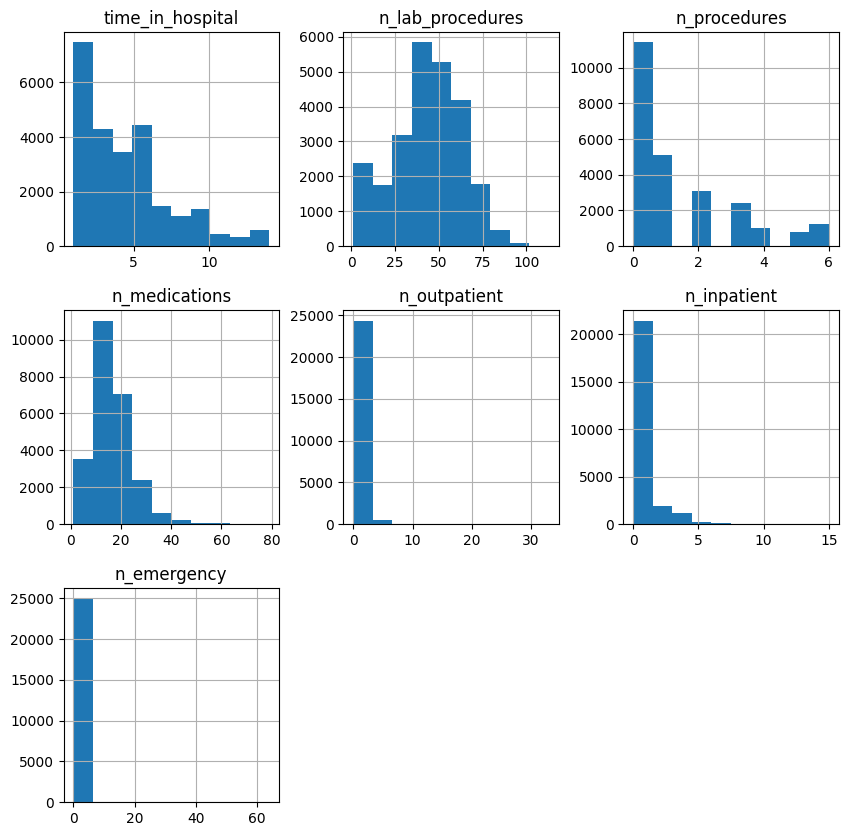

In [33]:
df.hist(figsize=(10,10))